Name: Sathwick Kiran M S 
UBID: 50602287

# Part 1: Big Data Processing(50 points)

### All libraries and dependencies needed

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report


## Part 1: Big Data Processing(50 point)
### Task 1: Data Cleaning And Exploration(20 points)

#### 1) Here, we are loading the dataset into a Pandas DataFrame and print the meta deta of coloumn information

In [19]:
df = pd.read_csv("NVDA.csv")
print("Column Information:")
print(df.info())
print(df.head())

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       522 non-null    object 
 1   Open       521 non-null    float64
 2   High       522 non-null    float64
 3   Low        523 non-null    float64
 4   Close      522 non-null    float64
 5   Adj Close  523 non-null    float64
 6   Volume     521 non-null    float64
dtypes: float64(6), object(1)
memory usage: 28.7+ KB
None
       Date    Open       High     Low   Close  Adj Close       Volume
0  2022/7/1  14.899  15.063000  14.392  14.523  14.506663  577610000.0
1  2022/7/5  14.175  14.971000  14.055  14.964  14.947166  651397000.0
2  2022/7/6  15.010  15.319000  14.789  15.130  15.112980  529066000.0
3  2022/7/7  15.456  15.945000  15.389  15.858  15.840160  492903000.0
4  2022/7/8  15.430  16.037001  15.389  15.838  15.820185  467972000.0


#### 2) Check for missing values and handle them appropriately.

In [23]:
# Check for missing values in all columns
missing_values =df.isnull().sum()

# First, we will check for the values which are missing before cleaning them.,
print("Values missing before cleaning:")
print(missing_values)
df = df.dropna(subset=['Date'])
df = df.ffill()

missing_values_after = df.isnull().sum()
print("\nMissing values after cleaning:")
print(missing_values_after)
print("\nFirst few rows after handling missing values:")
print(df.head())


Values missing before cleaning:
Date         1
Open         2
High         1
Low          0
Close        1
Adj Close    0
Volume       2
dtype: int64

Missing values after cleaning:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

First few rows after handling missing values:
       Date    Open       High     Low   Close  Adj Close       Volume
0  2022/7/1  14.899  15.063000  14.392  14.523  14.506663  577610000.0
1  2022/7/5  14.175  14.971000  14.055  14.964  14.947166  651397000.0
2  2022/7/6  15.010  15.319000  14.789  15.130  15.112980  529066000.0
3  2022/7/7  15.456  15.945000  15.389  15.858  15.840160  492903000.0
4  2022/7/8  15.430  16.037001  15.389  15.838  15.820185  467972000.0


#### 3) Convert the date coloumn toa different datetime format.,


In [25]:
df = df.assign(Date=pd.to_datetime(df['Date']))
first_rows = df.head()
print(first_rows)

        Date    Open       High     Low   Close  Adj Close       Volume
0 2022-07-01  14.899  15.063000  14.392  14.523  14.506663  577610000.0
1 2022-07-05  14.175  14.971000  14.055  14.964  14.947166  651397000.0
2 2022-07-06  15.010  15.319000  14.789  15.130  15.112980  529066000.0
3 2022-07-07  15.456  15.945000  15.389  15.858  15.840160  492903000.0
4 2022-07-08  15.430  16.037001  15.389  15.838  15.820185  467972000.0


#### 4) Compute basic statistics (min, max, mean, median, standard deviation) for each numerical feature.,


In [31]:
stats = df.describe(include='all')
print(stats)

                                Date        Open        High         Low  \
count                            522  522.000000  522.000000  522.000000   
mean   2023-07-15 15:29:39.310344704   46.763362   47.616234   45.853726   
min              2022-07-01 00:00:00   10.971000   11.735000   10.813000   
25%              2023-01-06 18:00:00   18.165500   18.736000   17.895249   
50%              2023-07-17 12:00:00   42.287498   42.948999   41.651998   
75%              2024-01-22 18:00:00   59.929250   60.225751   58.948750   
max              2024-07-31 00:00:00  139.800003  140.759995  132.419998   
std                              NaN   32.827653   33.407052   32.044071   

            Close   Adj Close        Volume  
count  522.000000  522.000000  5.220000e+02  
mean    46.788335   46.773798  4.838382e+08  
min     11.227000   11.217702  1.679340e+08  
25%     18.361499   18.340843  3.841098e+08  
50%     42.309500   42.296837  4.574970e+08  
75%     59.818251   59.810533  5.513095

#### 5) Plot the closing price over time using Matplotlib.,


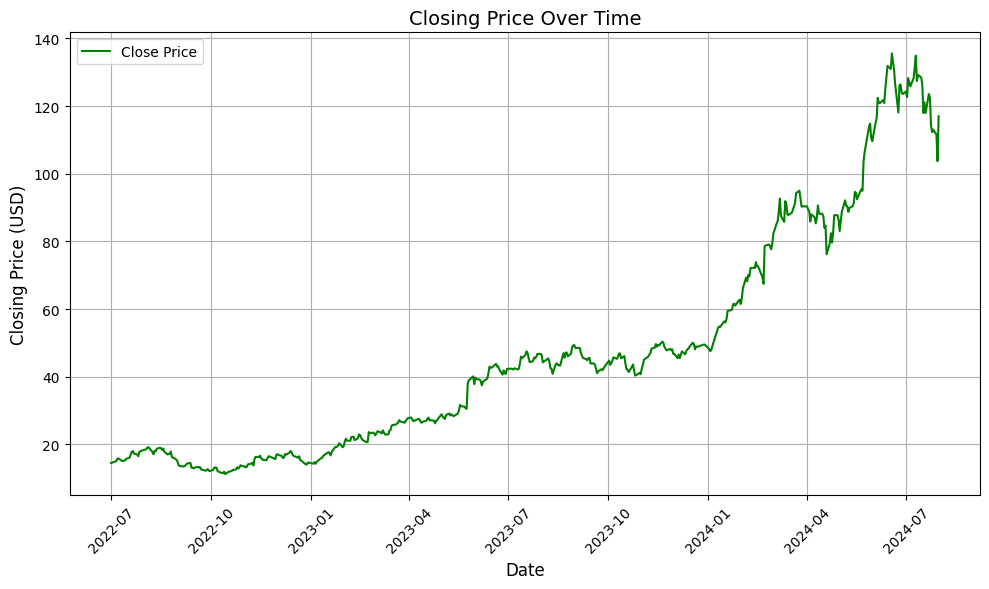

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['Date'], df['Close'], label='Close Price', color='green')

ax.set_title('Closing Price Over Time', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Closing Price (USD)', fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()

### Task 2: Feature Engineering 

#### 1) Create a new column for daily returns based on the adjusted closing price (0 for the first day) and and print the top 10 dates with the highest daily return.

In [43]:
df['Daily Return'] = pd.to_numeric(df['Adj Close'].pct_change(), errors='coerce')
df.at[0, 'Daily Return'] = 0
top_10_returns = df.loc[:, ['Date', 'Daily Return']].nlargest(10, 'Daily Return')
print("Dates with Highest Daily Returns:")
print(top_10_returns)

Dates with Highest Daily Returns:
          Date  Daily Return
226 2023-05-25      0.243696
412 2024-02-22      0.164009
92  2022-11-10      0.143293
162 2023-02-23      0.140214
522 2024-07-31      0.128121
476 2024-05-23      0.093197
285 2023-08-21      0.084713
105 2022-11-30      0.082379
17  2022-07-27      0.076030
140 2023-01-23      0.075901


#### 2) # Calculate the 7-day moving average of the closing price

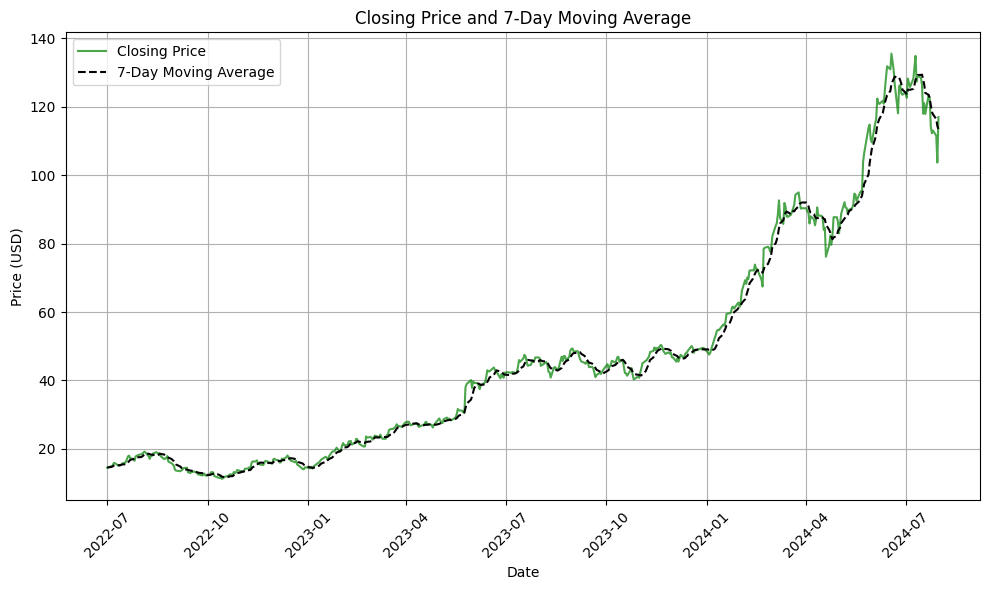

In [49]:
#We first calculate 7-day moving average and plit the graph
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(df['Date'], df['Close'], label='Closing Price', color='green', alpha=0.7)
ax.plot(df['Date'], df['Close'].rolling(window=7, min_periods=1).mean(), label='7-Day Moving Average', color='black', linestyle='--')
ax.set(title='Closing Price and 7-Day Moving Average', xlabel='Date', ylabel='Price (USD)')
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 3) Normalize Trading volume coloumn using Min-Max Scaling and print the top 10 date with the highest volume.

In [51]:
df['Normalized Volume'] = (df['Volume'] - df['Volume'].min()) / (df['Volume'].max() - df['Volume'].min())
top_10_volume = df[['Date', 'Normalized Volume']].sort_values(by='Normalized Volume', ascending=False).head(10)
print("Top 10 Dates with Highest Normalized Trading Volume:")
print(top_10_volume)

Top 10 Dates with Highest Normalized Trading Volume:
          Date  Normalized Volume
226 2023-05-25           1.000000
43  2022-09-01           0.734701
288 2023-08-24           0.718115
423 2024-03-08           0.708104
162 2023-02-23           0.690463
229 2023-05-31           0.606584
25  2022-08-08           0.591525
264 2023-07-21           0.578378
289 2023-08-25           0.550450
228 2023-05-30           0.549040


### Task 3:Data Visualization(15 points) 

#### 1) Create a histogram of daily returns.

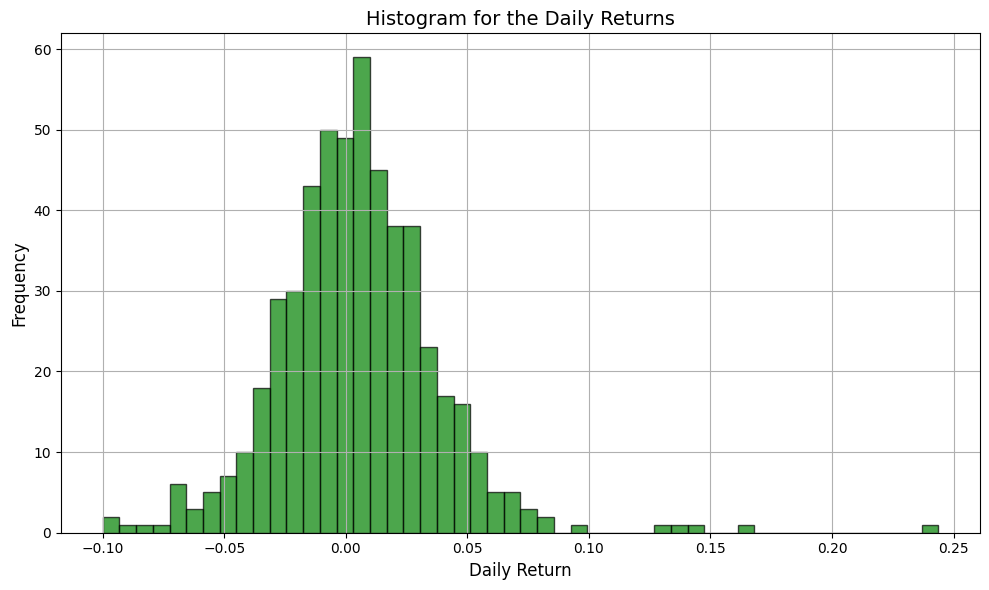

In [65]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['Daily Return'], bins=50, color='green', edgecolor='black', alpha=0.7)

ax.set_title('Histogram for the Daily Returns', fontsize=14)
ax.set_xlabel('Daily Return', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.show()

#### 2) Generate a boxplot of the trading volume.

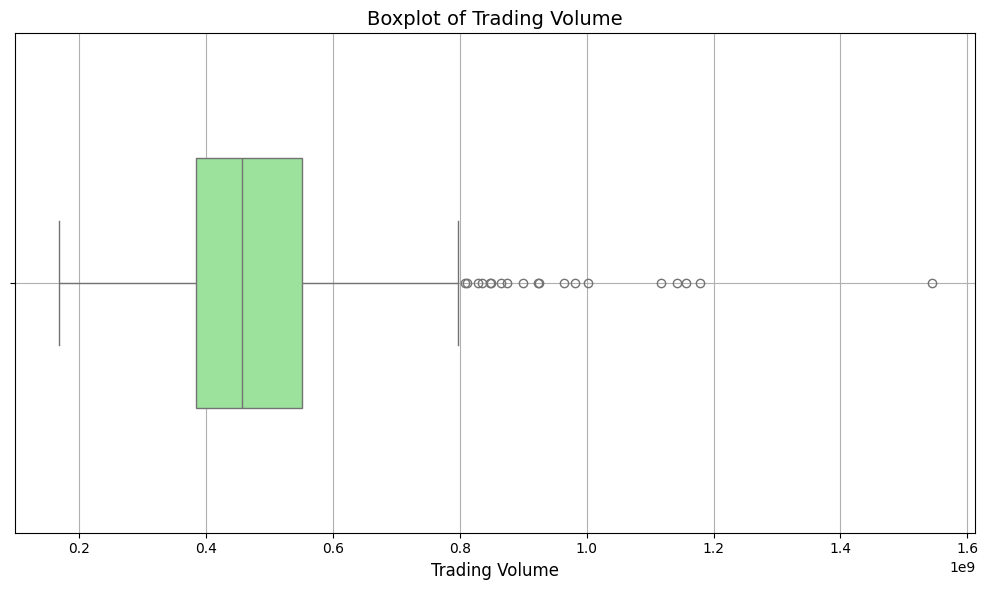

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=df['Volume'], color='lightgreen', width=0.5, ax=ax)
ax.set_title('Boxplot of Trading Volume', fontsize=14)
ax.set_xlabel('Trading Volume', fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.show()

#### 3) Display a correlation heatmap of all numerical features.

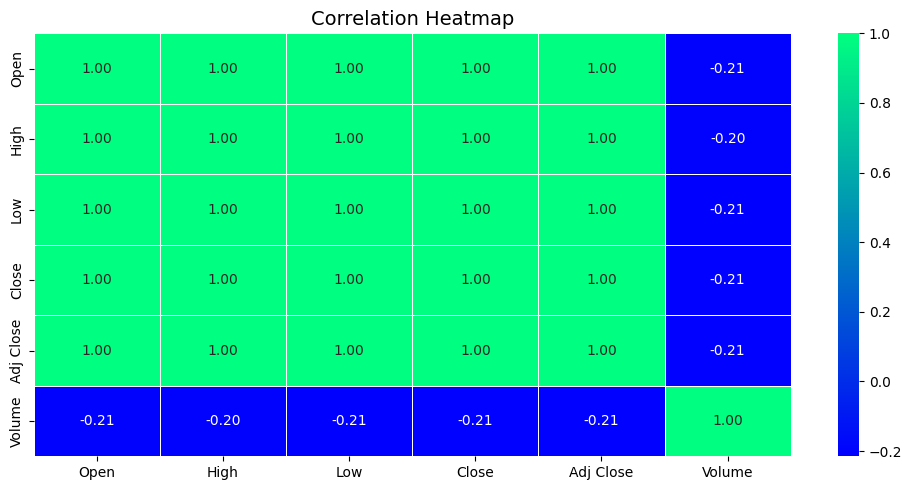

In [75]:
fig, ax = plt.subplots(figsize=(10, 5))
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='winter', fmt='.2f', linewidths=0.5, ax=ax)
ax.set_title('Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

### Part 2: Machine Learning(50 points)

### Task 1: Clustering with KMeans(20 points)

#### 1) Select relevant features for clustering.

In [93]:
scaler = MinMaxScaler()
scaler.fit(df[['Daily Return', 'Normalized Volume', 'Adj Close']])
normalized_features = scaler.transform(df[['Daily Return', 'Normalized Volume', 'Adj Close']])
normalized_df = pd.DataFrame(normalized_features, columns=['Normalized Daily Return', 'Normalized Volume', 'Normalized Adj Close'])
print(normalized_df.head())

   Normalized Daily Return  Normalized Volume  Normalized Adj Close
0                 0.291049           0.297735              0.026447
1                 0.379388           0.351360              0.029989
2                 0.323322           0.262455              0.031322
3                 0.431027           0.236173              0.037169
4                 0.287381           0.218055              0.037009


#### 2) Determine the optimal number of clusters using the elbow method.

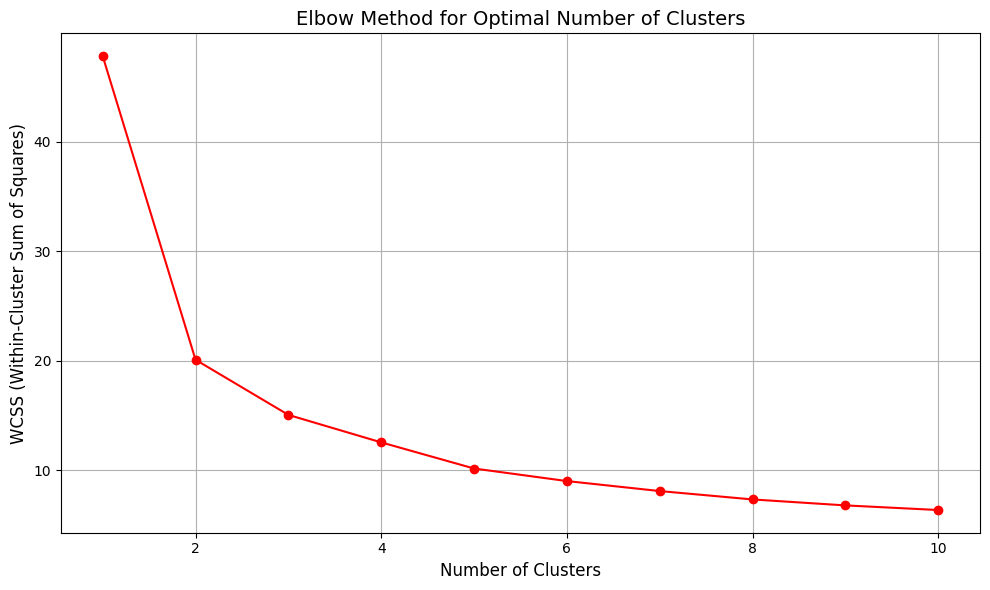

In [103]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
import warnings
features_for_clustering = df[['Daily Return', 'Normalized Volume', 'Adj Close']]
scaler = MinMaxScaler()
# Normalize the features
normalized_features = scaler.fit_transform(features_for_clustering)

warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")
X = normalized_features
wcss = []
# Calculate WCSS for cluster sizes ranging from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


#### 3) Apply KMeans clustering and visualize the resulting clusters using a scatter plot.

/var/folders/gp/x8l4rnjn35g8r75l3dbgstn80000gn/T/ipykernel_2249/1106831858.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


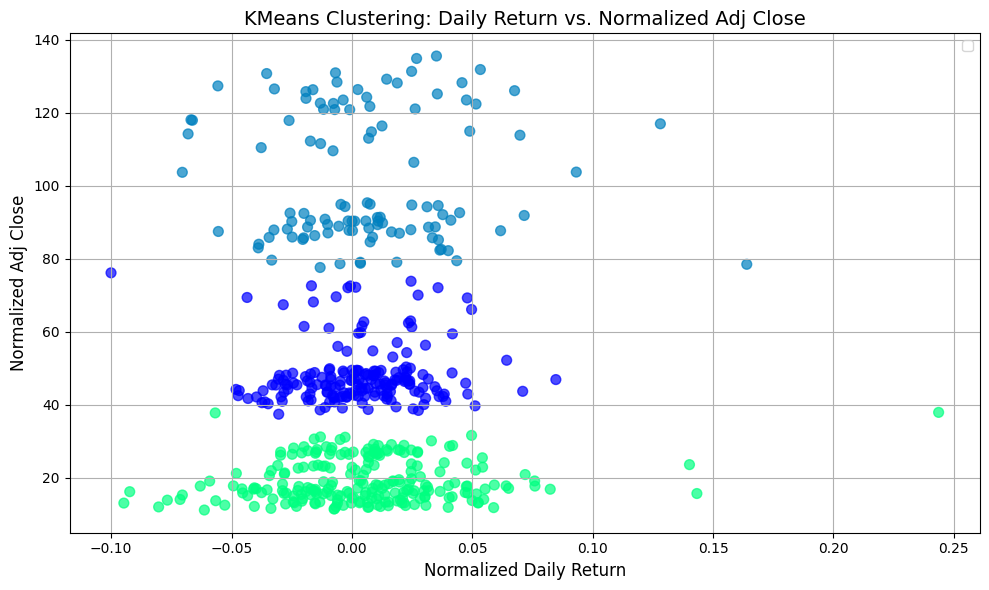

In [109]:

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_
plt.figure(figsize=(10, 6))
plt.scatter(df['Daily Return'], df['Adj Close'], c=df['Cluster'], cmap='winter', s=50, alpha=0.7)
plt.title('KMeans Clustering: Daily Return vs. Normalized Adj Close', fontsize=14)
plt.xlabel('Normalized Daily Return', fontsize=12)
plt.ylabel('Normalized Adj Close', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 4) Interpret the clusters and descrivbe potential insights.

a) Green cluster points may represent low-volatile stocks with moderate daily returns, they have low adjusted closing prices and they appear steady.

b) The prices of stocks with a dark blue cluster are modest; they may be mid-cap stocks with slightly greater daily returns.

c) The light blue cluster's equities have the highest adjusted closing prices and the most spared daily return, which indicates that they may be more volatile and have the fastest-growing stocks.

d) Lightblue clusters have more risk but higher returns than green clusters, which appear to have lower risk.

e) A scatter plot demonstrates how well-diversified and trend-capturing the portfolio is.

### Task 2: Other Machine Learning methods (30 points)

#### 1) Stock Price Prediction

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
target = 'Close'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Training and Model Evaluation for Linear Regresion

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
pred_linear = linear_model.predict(X_test_scaled)
rmse_lr = np.sqrt(mean_squared_error(y_test, pred_linear))
r2_lr = r2_score(y_test, pred_linear)
print(f'Linear Regression RMSE: {rmse_lr:.4f}')
print(f'Linear Regression R² Score: {r2_lr:.4f}')


Linear Regression RMSE: 0.0168
Linear Regression R² Score: 1.0000


#### Bonus ML Method - Ridge Regression Model

In [27]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Ridge Regression Model RMSE: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')


Ridge Regression Model RMSE: 0.6060
R² Score: 0.9997


###  2) Trends Classification

In [29]:
df['Price Change'] = df['Close'].shift(-1) - df['Close']
df['Trend'] = df['Price Change'].apply(lambda x: 1 if x > 0 else 0)
df.dropna(inplace=True)
features = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']] 
target = df['Trend']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)


#### Training and model evaluation of Support Vector Machine

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_model = SVC(kernel='rbf', random_state=0)
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.5333
Confusion Matrix:
[[ 5 44]
 [ 5 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.10      0.17        49
           1       0.54      0.91      0.68        56

    accuracy                           0.53       105
   macro avg       0.52      0.51      0.42       105
weighted avg       0.52      0.53      0.44       105

